In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pathlib import Path

In [8]:
image_dir = Path('/home/dsw/data/kaggle/PollenDataset/')

In [11]:
images = get_image_files(image_dir/'images')
images[:5]

[PosixPath('/home/dsw/data/kaggle/PollenDataset/images/P26577-183r.jpg'),
 PosixPath('/home/dsw/data/kaggle/PollenDataset/images/NP63199-211r.jpg'),
 PosixPath('/home/dsw/data/kaggle/PollenDataset/images/P52738-30r.jpg'),
 PosixPath('/home/dsw/data/kaggle/PollenDataset/images/NP7466-94r.jpg'),
 PosixPath('/home/dsw/data/kaggle/PollenDataset/images/P26910-193r.jpg')]

In [12]:
#def get_labels(f_path):
def get_labels(f_path): return 'N' if 'N' in str(f_path) else 'P'  

In [27]:
# Get the directory of the first image -- this works if all images are in the same directory
f_path = str(images[0].parent)
bs = 64
transforms = get_transforms(flip_vert=False, max_zoom=1.)
data = ImageDataBunch.from_name_func(f_path, images, label_func=get_labels, ds_tfms=transforms, size=224, bs=bs
                                    ).normalize(imagenet_stats)

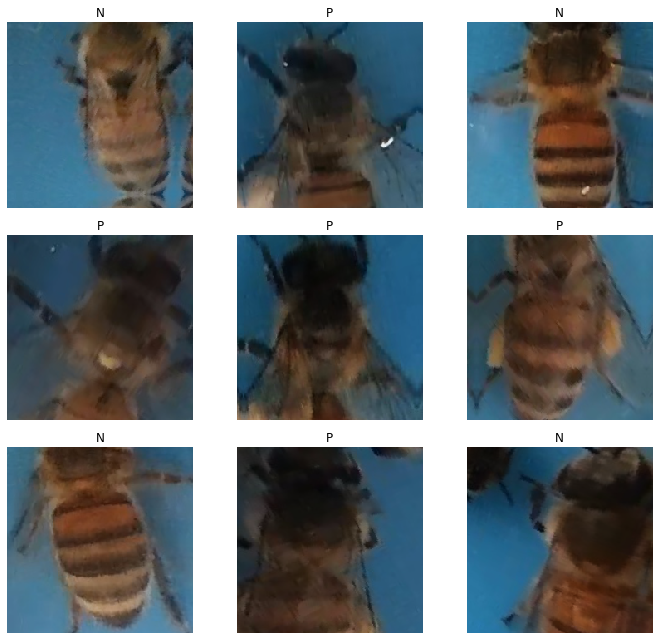

In [29]:
data.show_batch(rows=3, figsize=(10,9))

In [30]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['N', 'P'], 2, 572, 142)

In [39]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir='/tmp')
learn.model = torch.nn.DataParallel(learn.model)

In [38]:
type(learn)

fastai.basic_train.Learner

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


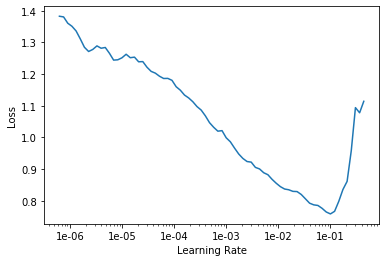

In [40]:
learn.lr_find()
learn.recorder.plot()

In [35]:
lr = 0.01

In [41]:
learn.fit_one_cycle(7, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.904512,0.559396,0.147887,00:05
1,0.828020,1.048396,0.197183,00:05
2,0.717977,0.510089,0.140845,00:04
3,0.611003,0.342558,0.098592,00:05
4,0.534791,0.332583,0.119718,00:05
5,0.480316,0.276128,0.112676,00:05
6,0.432042,0.278046,0.105634,00:05


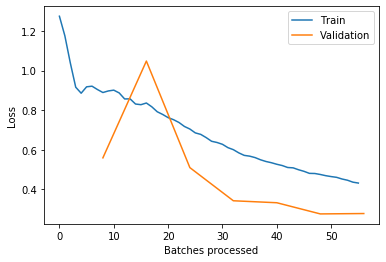

In [42]:
learn.recorder.plot_losses()

In [43]:
learn.save('stage-1-rn50')

In [46]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


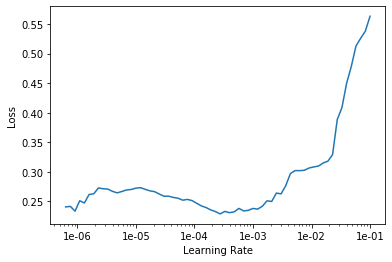

In [47]:
learn.lr_find()
learn.recorder.plot()

In [59]:
slice(1e-4, 0.0007)

slice(0.0001, 0.0007, None)

In [60]:
learn.fit_one_cycle(5, slice(1e-4, 0.0007))

epoch,train_loss,valid_loss,error_rate,time
0,0.188134,0.350159,0.140845,00:05
1,0.232021,0.365496,0.112676,00:05
2,0.196584,0.165210,0.049296,00:05
3,0.178843,0.244564,0.063380,00:05
4,0.177994,0.180670,0.049296,00:05


In [61]:
learn.save('stage-2-rn50')

# Increase the size of the images

In [63]:
data2 = ImageDataBunch.from_name_func(f_path, images, label_func=get_labels, ds_tfms=transforms, size=299, bs=bs
                                    ).normalize(imagenet_stats)


In [64]:
learn.data = data2

In [65]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


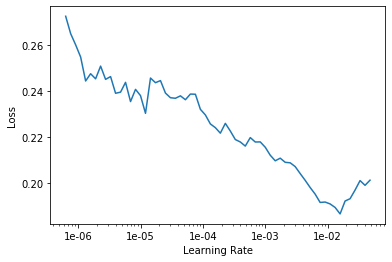

In [67]:
learn.lr_find()
learn.recorder.plot()

In [68]:
lr = 1e-3/2

In [75]:
learn.fit_one_cycle(20, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,0.117855,0.102700,0.042254,00:06
1,0.131508,0.107930,0.042254,00:06
2,0.126013,0.102847,0.042254,00:06
3,0.120565,0.091580,0.035211,00:06
4,0.119492,0.098349,0.049296,00:06
5,0.119002,0.106486,0.070423,00:06
6,0.119665,0.095241,0.042254,00:06
7,0.121649,0.100405,0.056338,00:06
8,0.122776,0.095063,0.042254,00:06
9,0.127695,0.083468,0.035211,00:06


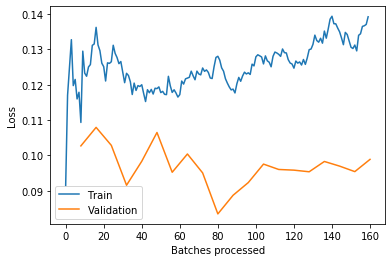

In [76]:
learn.recorder.plot_losses()

# Interpret results

In [77]:
interp = ClassificationInterpretation.from_learner(learn)

In [78]:
interp.confusion_matrix()

array([[67,  3],
       [ 3, 69]])

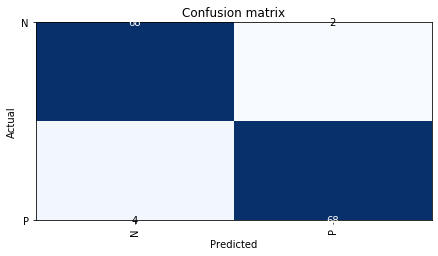

In [74]:
interp.plot_confusion_matrix()

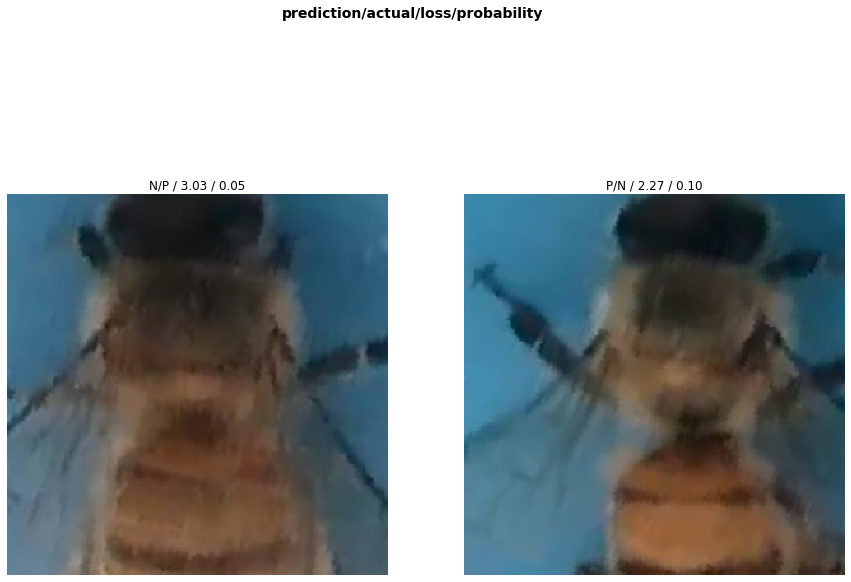

In [80]:
interp.plot_top_losses(2, figsize=(15,11), heatmap=False)

In [81]:
dir(learn)

['TTA',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_test_writeable_path',
 'add_time',
 'apply_dropout',
 'backward',
 'bn_wd',
 'callback_fns',
 'callbacks',
 'cb_fns_registered',
 'clip_grad',
 'create_opt',
 'data',
 'destroy',
 'dl',
 'export',
 'fit',
 'fit_one_cycle',
 'freeze',
 'freeze_to',
 'get_preds',
 'init',
 'interpret',
 'layer_groups',
 'load',
 'loss_func',
 'lr_find',
 'lr_finder',
 'lr_range',
 'metrics',
 'mixup',
 'model',
 'model_dir',
 'one_cycle_scheduler',
 'opt',
 'opt_func',
 'path',
 'pred_batch',
 'predict',
 'predict_with_mc_dropout',
 'purge',
 '